In [1]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
import task
import methods
import utility as ut
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition
import matplotlib.ticker as ticker
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

C:\Users\pinak\Documents\GitHub\NMA


In [2]:
db_path = '../../data/hcp_task'
save_folder = 'story_2'
@ut.timer
def score_plot(max_comps=100, k_folds=8, **svm_params):
    score_dict = {'score': [], 'n_comps': [], 'wm_task': []}
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        data, labels = group.transpose(data)
        for comp in range(max_comps+1):
            print('Working on {} task with n_comps = {}'.format(wm_task, comp), end='\r')
            new_data = sklearn.decomposition.PCA(n_components=comp).fit_transform(data.reshape(data.shape[0], -1))
            svm = methods.SVM(kernel='rbf', **svm_params)
            score_dict['score'] += list(svm.cross_val(new_data, labels, k_folds) * 100.0)
            score_dict['n_comps'] += [comp] * k_folds 
            score_dict['wm_task'] += [wm_task] * k_folds
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    df = pd.DataFrame.from_dict(score_dict)
    sns.pointplot(x='n_comps', y='score', hue='wm_task', data=df, ax=ax)
    ax.set_ylabel('SVM accuracy (%)', fontsize=20)
    ax.set_xlabel('number of principal components', fontsize=20)    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.FixedLocator(list(range(0, max_comps+1, 5))))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize=15)
    plt.savefig(save_folder + '/svm_scores.png')
    plt.show()
    df.to_csv(save_folder + '/svm_scores.csv', index=None)
    return df

Time taken by extract_con is 1.6381585597991943 seconds
Time taken by extract_con is 1.9695451259613037 seconds
Time taken by extract_con is 2.672736167907715 seconds
Time taken by extract_con is 3.013617992401123 seconds
Time taken by extract_cons is 9.618035316467285 seconds
Time taken by transpose is 0.5139760971069336 seconds
Time taken by massive_shuffle is 0.042954444885253906 seconds
Time taken by cross_val is 0.06140279769897461 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\P

Time taken by massive_shuffle is 0.06989645957946777 seconds
Time taken by cross_val is 0.5886082649230957 seconds
Time taken by massive_shuffle is 0.0689554214477539 seconds
Time taken by cross_val is 0.3470160961151123 seconds
Time taken by massive_shuffle is 0.04893040657043457 seconds
Time taken by cross_val is 0.21439790725708008 seconds
Time taken by extract_con is 1.6970696449279785 seconds
Time taken by extract_con is 1.584855318069458 seconds
Time taken by extract_con is 1.5011022090911865 seconds
Time taken by extract_con is 1.490614652633667 seconds
Time taken by extract_cons is 6.464131116867065 seconds
Time taken by transpose is 0.26030516624450684 seconds
Time taken by massive_shuffle is 0.06688499450683594 seconds
Time taken by cross_val is 0.07692694664001465 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1260, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\P

Time taken by massive_shuffle is 0.046875953674316406 seconds
Time taken by cross_val is 0.39180421829223633 seconds
Time taken by massive_shuffle is 0.04188823699951172 seconds
Time taken by cross_val is 0.3032112121582031 seconds
Time taken by massive_shuffle is 0.05385565757751465 seconds
Time taken by cross_val is 0.22041082382202148 seconds


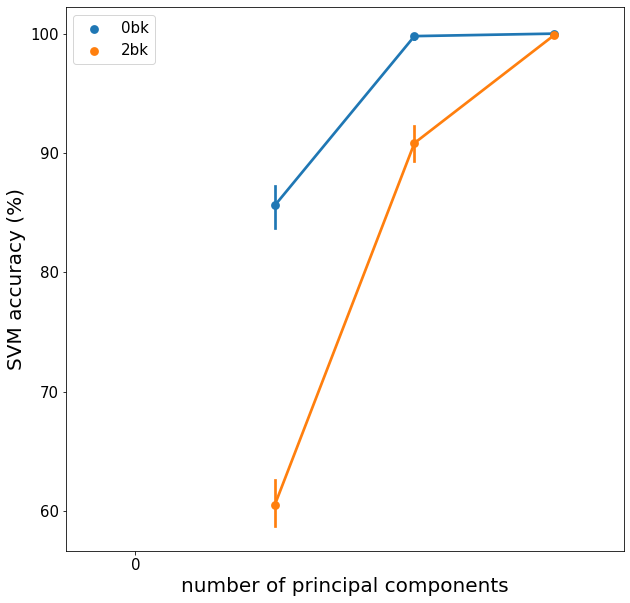

Time taken by score_plot is 65.11886239051819 seconds


,score,n_comps,wm_task
0,NaN,0,0bk
1,NaN,0,0bk
2,NaN,0,0bk
3,NaN,0,0bk
4,NaN,0,0bk
...,...,...,...
59,100.000000,3,2bk
60,100.000000,3,2bk
61,100.000000,3,2bk
62,100.000000,3,2bk


In [3]:
score_plot(max_comps=3, k_folds=8, gamma=1e-9, C=1.0)

In [6]:
@ut.timer
def tsne(perplexity, pca_comps=10):
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        data, labels = group.transpose(data)
        #data = group.squash_frames(data)
        #X = sklearn.decomposition.PCA(n_components=pca_comps).fit_transform(data.reshape(data.shape[0], -1))
        X = TSNE(n_components=2, perplexity=perplexity).fit_transform(data.reshape(data.shape[0], -1))
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        colors = ['#ff6f69', '#00b159', '#eb6841', '#0e9aa7']
        for i in range(4):
            idx = list(range(i*group.n_subjects, (i+1)*group.n_subjects))
            x = X[idx]
            ax.scatter(x[:, 0], x[:, 1], c=colors[i], label=conditions[i])
        ax.set_xlabel('t-SNE 1st component', fontsize=20)
        ax.set_ylabel('t-SNE 2nd component', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        plt.legend(fontsize=15)
        plt.savefig(save_folder + '/tsne_{}.png'.format(wm_task))
        plt.show()

Time taken by extract_con is 1.7375195026397705 seconds
Time taken by extract_con is 1.5776774883270264 seconds
Time taken by extract_con is 1.6730365753173828 seconds
Time taken by extract_con is 1.5297820568084717 seconds
Time taken by extract_cons is 6.72241997718811 seconds
Time taken by transpose is 0.31409716606140137 seconds


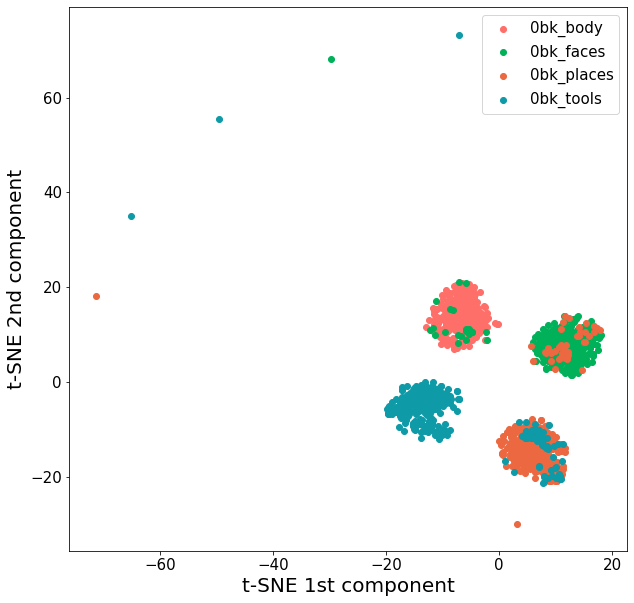

Time taken by extract_con is 1.6439073085784912 seconds
Time taken by extract_con is 1.6007850170135498 seconds
Time taken by extract_con is 1.8450534343719482 seconds
Time taken by extract_con is 1.6628248691558838 seconds
Time taken by extract_cons is 6.942347764968872 seconds
Time taken by transpose is 0.3260800838470459 seconds


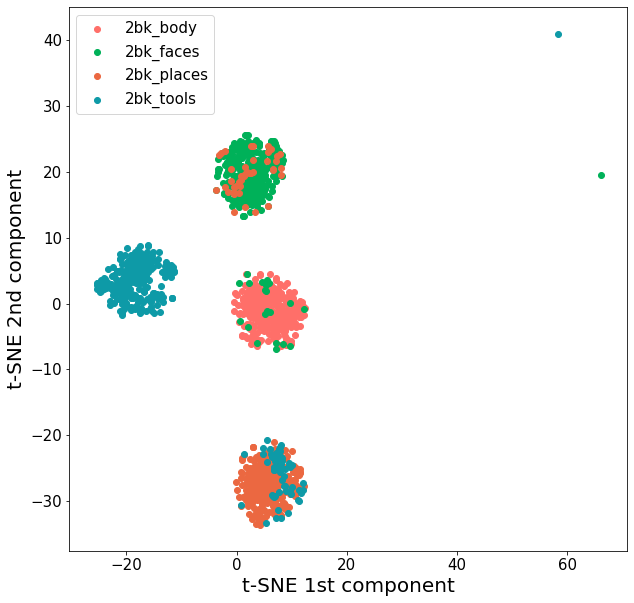

Time taken by tsne is 292.4403929710388 seconds


In [7]:
tsne(50)